In [12]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [14]:
# List of cities
cities = ["Houston", "Las Vegas", "Los Angeles", "Miami", "Phoenix",]

# set up lists to hold reponse info
temp = []
humidity = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    


print(f"The temperature information received is: {temp}")
print(f"The humidity information received is: {humidity}")

The temperature information received is: [89.71, 95.14, 70.59, 80.44, 96.64]
The humidity information received is: [49, 18, 64, 77, 21]


In [20]:
# created a data frame from cities, temp, and humidity
weather_dict = {
    "city": cities,
    "temp": temp,
    "humidity": humidity
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,temp,humidity
0,Houston,89.60,49
1,Las Vegas,95.14,18
2,Los Angeles,70.90,63
3,Miami,80.44,77
4,Phoenix,96.64,21


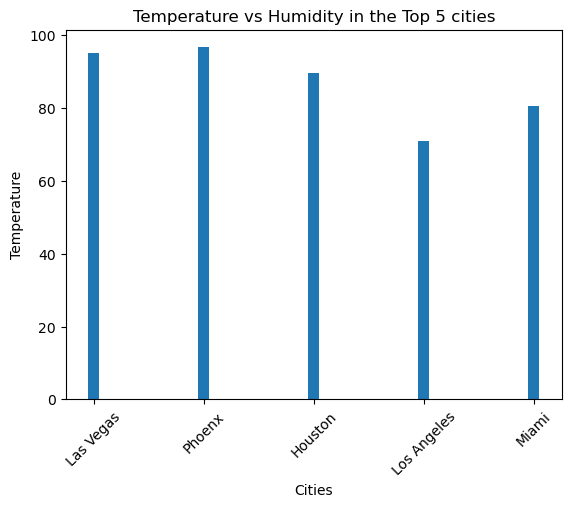

In [26]:
#Create a Visual Aid for Cities

#City names
cities= ['Las Vegas', 'Phoenx', 'Houston', 'Los Angeles', 'Miami']
humidity = [18, 21, 49, 63, 77]
temperature = [95.14, 96.64, 89.60, 70.90, 80.44]

plt.title('Temperature vs Humidity in the Top 5 cities')
plt.bar(range(len(cities)), temperature, width=0.1)
plt.xlabel('Cities')
plt.ylabel('Temperature')


# Set custom tick labels on the X-axis
plt.xticks(range(len(cities)), cities, rotation=45)

plt.show()